In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

In [127]:
h_laser_low = 1200
h_laser_med = 1200
h_laser_high = 1200

In [128]:
date = "20160908-172729-203"
fname = 'results/' + date + '.txt'

print date
data = np.loadtxt(fname, dtype='float')

20160908-172729-203


In [129]:
data.shape

(50, 4)

In [130]:
pix_dist = data[: , 0].ravel()
altitude = data[: , 1].ravel()
alt_err = data[: , 2].ravel()
# integral brightness of fragment
int_brightness = data[:, 3].ravel()

In [131]:
# Remove all enlements with ratio error > max_ratio_err
max_ratio_err = 0.7
mask = ( alt_err / altitude <= max_ratio_err)

pix_dist = pix_dist[mask]
altitude = altitude[mask]
alt_err = alt_err[mask]
int_brightness = int_brightness[mask]

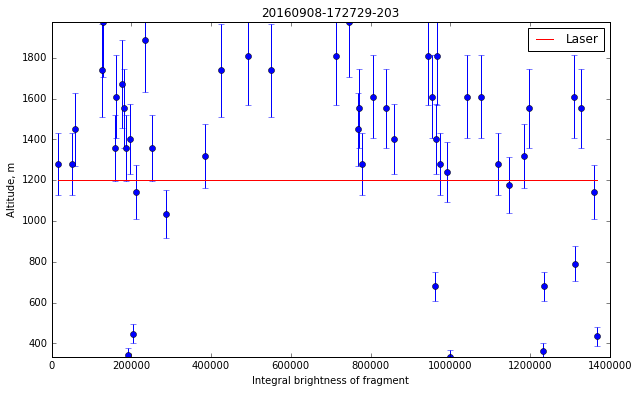

In [132]:
plt.figure(figsize=(10, 6))
plt.errorbar(int_brightness, altitude, yerr=alt_err, marker='o', linestyle='None')
plt.title(date)
plt.xlabel('Integral brightness of fragment')
plt.ylabel('Altitude, m')
plt.plot(int_brightness, h_laser_low * np.ones_like(altitude), 'r', label='Laser')
plt.plot(int_brightness, h_laser_med * np.ones_like(altitude), 'r')
plt.plot(int_brightness, h_laser_high * np.ones_like(altitude), 'r')
plt.legend(loc='best')
plt.ylim( (min( altitude.min(), 0.6 * h_laser_low),
           max(altitude.max(), 1.1 * h_laser_high)) )
plt.savefig('results/' +'plot_' + date + '_' + str(altitude.shape[0]) + '.png')

In [133]:
print altitude

[ 1174.5315  1810.7361  1810.7361  1609.5432  1609.5432  1278.1666
  1738.3066  1448.5889  1401.8602  1278.1666  1278.1666  1810.7361
   334.2897   448.0172  1358.0521  1609.5432  1552.0595  1552.0595
  1552.0595  1738.3066  1401.8602  1278.1666   342.1863  1358.0521
  1241.6476  1609.5432  1316.899   1552.0595  1810.7361  1401.8602
  1889.4637   434.5767   679.026   1448.5889  1552.0595  1671.4487
  1143.6228   362.1472  1034.7063   679.026   1358.0521  1975.3484
  1278.1666  1143.6228  1609.5432   790.1394  1738.3066  1316.899
  1609.5432  1975.3484]
